In [76]:
import torch
import math
import numpy as np
from torch import nn
import random
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import chart_studio.tools as tls
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pandas as pd
import copy 
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from celluloid import Camera
import time
import torchvision
import torch.nn.functional as F

# Hyper Params

In [3]:

n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)


# Import MNIST Data set

In [6]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

Extracting /files/MNIST\raw\train-images-idx3-ubyte.gz to /files/MNIST\raw


Extracting /files/MNIST\raw\train-labels-idx1-ubyte.gz to /files/MNIST\raw


Extracting /files/MNIST\raw\t10k-images-idx3-ubyte.gz to /files/MNIST\raw


Extracting /files/MNIST\raw\t10k-labels-idx1-ubyte.gz to /files/MNIST\raw
Processing...
Done!
..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning:

The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.



In [13]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)
print(example_targets.shape)

torch.Size([1000, 1, 28, 28])
torch.Size([1000])


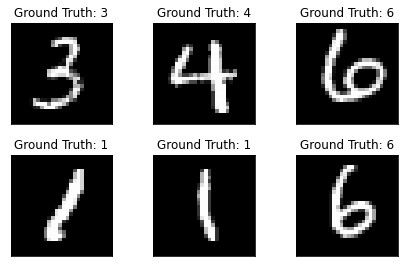

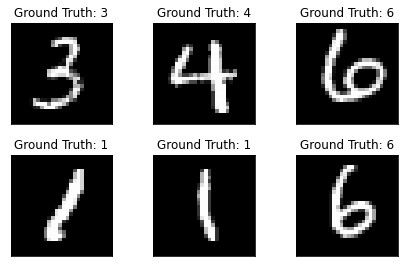

In [12]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [101]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1,10, kernel_size=5),
            nn.ReLU(),

            nn.Linear(22,64),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.LogSoftmax(dim=1),
        )
    
    def forward(self, x):
        x = self.network(x)
        return x




# Train the network

In [103]:
device = torch.device("cpu")
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate)
criterion = torch.nn.BCELoss()
net.train()
start = time.time()
for epoch in range(n_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = net(data)
        print(y_pred.squeeze().shape)
        loss = criterion(y_pred.squeeze(), target)
        loss.backward()
        optimizer.step()

end = time.time()
total = end-start
print("Took: " + str(total))



torch.Size([64, 10, 24, 10])


ValueError: Target and input must have the same number of elements. target nelement (64) != input nelement (153600)

In [ ]:
            nn.Conv2d(1,8, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(8,16, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(16,32, kernel_size=3),
            nn.ReLU(),
            nn.Linear(991232,64),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.Softmax(),